## Inteligență Artificială  Tema 1 - 2025: Sokoban

Responsabili:
- Andrei Olaru
- Cătălin Chiru
- Andrei Dugăeșescu
- Mihai Nan
- Vlad Matei Drăghici
- Alexandru Baciu
- Bogdan-Andrei Sprîncenatu

In [1]:
from sokoban import Map, save_images, create_gif
import time

# Creating a map 

In [2]:
# Maps can be created using the Map class
map_from_init = Map(5, 5, 0, 0, [('box1', 1, 3)], [(4, 4)], [(3,3), (3,4), (3,1)], 'easy_map1')

# Maps can be created through yaml files
map_from_yaml = Map.from_yaml('tests/easy_map1.yaml')

assert str(map_from_init) == str(map_from_yaml), "Reading from yaml file Failed"

In [3]:
# Maps can also be created from their string representation
map_str = str(map_from_init)
map_from_str = Map.from_str(map_str)

assert str(map_from_init) == str(map_from_str), "String conversion Failed"

# Solving a map 

In [4]:
map = Map(5, 5, 0, 0, [('box1', 1, 3)], [(4, 4)], [(3,3), (3,4), (3,1)], 'easy_map1')

# Visualizing a map 

In [5]:
print(map)


_ _ _ _ X 
_ / _ / / 
_ _ _ _ _ 
_ _ _ B _ 
P _ _ _ _ 


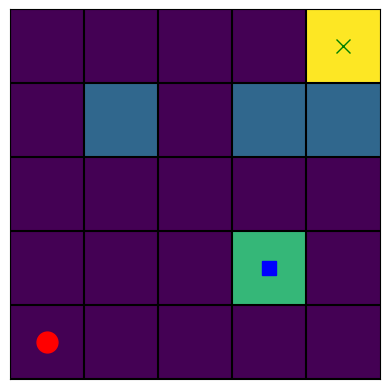

In [6]:
map.plot_map()

In [7]:
# To save the state of a map to disk:
#map.save_map('images', 'easy_map1_init.png')

# Fetching the maps

In [8]:
""" Store the maps from the .yaml files, organizing them in a map based on their
	advertised difficulty level. 
	Each key will have a corresponding tuple containing the map object and its name as a string
"""
EASY = 'easy'
MEDIUM = 'medium'
HARD = 'hard'
SUPER_HARD = 'super_hard'
LARGE = 'large'
MAP = 1
MAP_NAME = 0

maps = {}
for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	maps[difficulty] = []
	for i in range(1, 3):
		# There's only one super_hard map
		if difficulty == 'super_hard' and i == 2:
			continue
		map_name = f'{difficulty}_map{str(i)}'
		map_tuple = (map_name, Map.from_yaml(f'tests/{map_name}.yaml'))
		maps[difficulty].append(map_tuple)

for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	for map_tuple in maps[difficulty]:
		map = map_tuple[MAP]
		# remove the .yaml extension
		map_name = map_tuple[MAP_NAME].replace('.yaml', '')
		map.save_map('images/init_maps', map_name)

In [9]:
from search_methods.beam_search import BeamSearch
from search_methods.solver import Solver
from search_methods.heuristics import min_weight, manhattan

def create_steps_images(steps_path, map_name):
	""" 
		Creates images for each step in the solution and returns their path
	"""
	for i in range(len(steps_path)):
		map = steps_path[i]
		map.save_map(f'images/{map_name}/steps', f'{str(i)}')
	return f'images/{map_name}/steps'

print('#------------------------------------------------------------------------#')

for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	for map_tuple in maps[difficulty]:
		beam_width: int = 100
		solver = BeamSearch(map_tuple[MAP], beam_width, min_weight)
		# time the solver
		%time solution_path = solver.solve()
		if solution_path is not None:
			print(f"Found solution for {map_tuple[MAP_NAME]}")
			print(f'Total pull moves: {str(solution_path[-1].undo_moves)}')
			images_path = create_steps_images(solution_path, map_tuple[MAP_NAME])
			gif_save_path = f'images/{map_tuple[MAP_NAME]}'
			create_gif(images_path, 'animated', gif_save_path)
		else:
			print(f"Solution not found for {map_tuple[MAP_NAME]}")
		print('#------------------------------------------------------------------------#')



#------------------------------------------------------------------------#
Goal state found!
Explored state: 394
Reconstructed solution state size: 20
CPU times: total: 93.8 ms
Wall time: 93.2 ms
Found solution for easy_map1
Total pull moves: 0
#------------------------------------------------------------------------#
Goal state found!
Explored state: 183
Reconstructed solution state size: 10
CPU times: total: 31.2 ms
Wall time: 22 ms
Found solution for easy_map2
Total pull moves: 0
#------------------------------------------------------------------------#
Goal state found!
Explored state: 1726
Reconstructed solution state size: 22
CPU times: total: 172 ms
Wall time: 180 ms
Found solution for medium_map1
Total pull moves: 0
#------------------------------------------------------------------------#
Goal state found!
Explored state: 3216
Reconstructed solution state size: 33
CPU times: total: 422 ms
Wall time: 426 ms
Found solution for medium_map2
Total pull moves: 0
#-------------------